

## Import the data and briefly explore it again

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import random
import math

In [ ]:
url = "/content/drive/MyDrive/Colab Notebooks/Arterial catheters-MIMIC II/gen_arterial_catheters.csv"
df = pd.read_csv(url)

In [ ]:
df.columns

Index(['aline_flg', 'icu_los_day', 'L3_hospital_los_day', 'L7_age',
       'gender_num', 'L3_bmi', 'sapsi_first', 'sofa_first', 'afib_flg',
       'renal_flg', 'copd_flg', 'stroke_flg', 'map_1st', 'hr_1st', 'temp_1st',
       'spo2_1st', 'abg_count', 'wbc_first', 'hgb_first', 'platelet_first',
       'sodium_first', 'potassium_first', 'tco2_first', 'chloride_first',
       'bun_first', 'creatinine_first', 'po2_first', 'pco2_first',
       'day_28_flg', 'L1_age', 'L2_age', 'L3_age', 'L4_age', 'L5_age',
       'L6_age', 'L1_hospital_los_day', 'L2_hospital_los_day', 'L1_bmi',
       'L2_bmi'],
      dtype='object')

In [ ]:
# Define the new order of column names
new_order = ['gender_num', 'L1_age', 'L2_age', 'L3_age', 'L4_age', 'L5_age', 'L6_age', 'L7_age',
             'L1_bmi', 'L2_bmi', 'L3_bmi',
             'L1_hospital_los_day', 'L2_hospital_los_day', 'L3_hospital_los_day',
             'aline_flg', 'icu_los_day', 'sapsi_first', 'sofa_first',
             'afib_flg', 'renal_flg', 'copd_flg', 'stroke_flg', 'map_1st', 'hr_1st',
             'temp_1st', 'spo2_1st', 'abg_count', 'wbc_first', 'hgb_first',
             'platelet_first', 'sodium_first', 'potassium_first', 'tco2_first',
             'chloride_first', 'bun_first', 'creatinine_first', 'po2_first',
             'pco2_first', 'day_28_flg']

# Reorder the columns
df = df[new_order]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender_num           2515 non-null   float64
 1   L1_age               2513 non-null   object 
 2   L2_age               2513 non-null   object 
 3   L3_age               2513 non-null   object 
 4   L4_age               2513 non-null   object 
 5   L5_age               2513 non-null   object 
 6   L6_age               2513 non-null   object 
 7   L7_age               2515 non-null   float64
 8   L1_bmi               2515 non-null   object 
 9   L2_bmi               2515 non-null   object 
 10  L3_bmi               2515 non-null   float64
 11  L1_hospital_los_day  2515 non-null   object 
 12  L2_hospital_los_day  2515 non-null   object 
 13  L3_hospital_los_day  2515 non-null   int64  
 14  aline_flg            2515 non-null   int64  
 15  icu_los_day          2515 non-null   f

## Necessary pre-processing for CatBoost

In [ ]:
df ['gender_num'] = df ['gender_num'].astype(str)
df ['day_28_flg'] = df ['day_28_flg'].astype(int)


df ['L1_age'] = df ['L1_age'].astype(str)
df ['L2_age'] = df ['L2_age'].astype(str)
df ['L3_age'] = df ['L3_age'].astype(str)
df ['L3_age'] = df ['L3_age'].astype(str)
df ['L4_age'] = df ['L4_age'].astype(str)
df ['L5_age'] = df ['L5_age'].astype(str)
df ['L6_age'] = df ['L6_age'].astype(str)
df ['L7_age'] = df ['L7_age'].astype(str)

df ['L1_bmi'] = df ['L1_bmi'].astype(str)
df ['L2_bmi'] = df ['L2_bmi'].astype(str)
df ['L3_bmi'] = df ['L3_bmi'].astype(str)

df ['L1_hospital_los_day'] = df ['L1_hospital_los_day'].astype(str)
df ['L2_hospital_los_day'] = df ['L2_hospital_los_day'].astype(str)
df ['L3_hospital_los_day'] = df ['L3_hospital_los_day'].astype(str)



Visual distribution of categorical attributes

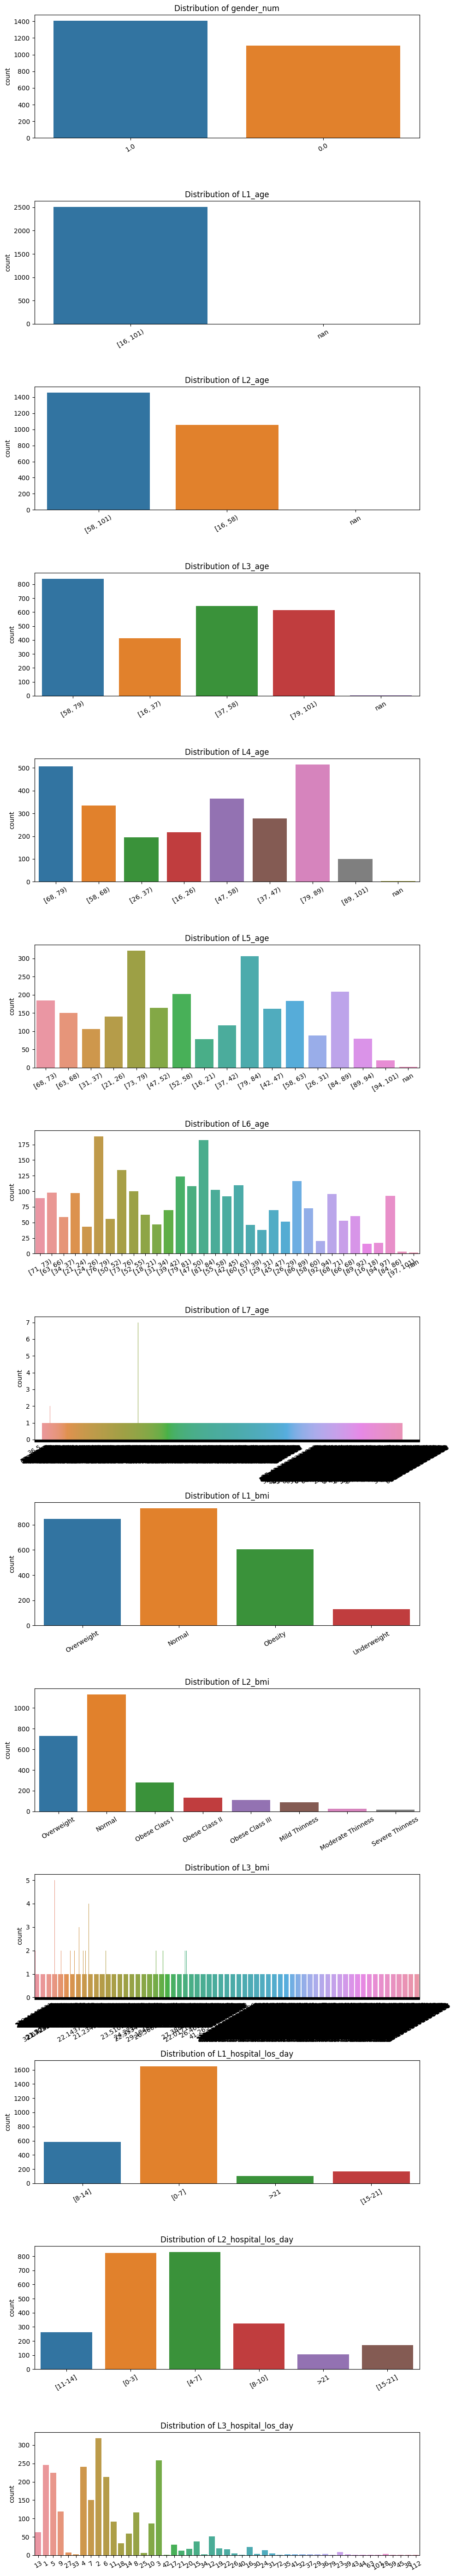

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of categorical columns to visualize
#cat_cols = ['sex', 'L7_age', 'L5_education', 'L3_occupation', 'L3_marital_status', 'L3_workclass', 'L3_native_country', 'L2_race', 'salary-class']
cat_cols = df.select_dtypes(include=['object']).columns

# Determine the number of subplots based on the number of categorical columns
num_subplots = len(cat_cols)

# Set up the subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 4 * num_subplots))

# Loop through each categorical column and create a countplot in the corresponding subplot
for i, column in enumerate(cat_cols):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)  # Rotate x-axis labels for better readability
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(None)  # Remove x-axis label for better layout

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
#df = df.drop('ID', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender_num           2515 non-null   object 
 1   L1_age               2515 non-null   object 
 2   L2_age               2515 non-null   object 
 3   L3_age               2515 non-null   object 
 4   L4_age               2515 non-null   object 
 5   L5_age               2515 non-null   object 
 6   L6_age               2515 non-null   object 
 7   L7_age               2515 non-null   object 
 8   L1_bmi               2515 non-null   object 
 9   L2_bmi               2515 non-null   object 
 10  L3_bmi               2515 non-null   object 
 11  L1_hospital_los_day  2515 non-null   object 
 12  L2_hospital_los_day  2515 non-null   object 
 13  L3_hospital_los_day  2515 non-null   object 
 14  aline_flg            2515 non-null   int64  
 15  icu_los_day          2515 non-null   f

In [ ]:
#Since the catboost model cannot read columns with interval values which are originally intended to be categories in the form of interval strings
def generate_interval_mappings(df, interval_columns):
    interval_mapping = {}

    for column in interval_columns:
        unique_intervals = df[column].unique()
        for interval in unique_intervals:
            if isinstance(interval, tuple):  # Check if the interval is a tuple
                mapping_key = f"{column}_{interval[0]}_{interval[1]}"
                interval_mapping[interval] = mapping_key
                print('interval mapping', interval_mapping)

    return interval_mapping

# List of columns with interval values
interval_columns = df[['L1_age', 'L2_age', 'L3_age', 'L4_age', 'L5_age',
       'L6_age', 'L7_age', 'L1_bmi', 'L2_bmi', 'L3_bmi', 'L1_hospital_los_day',
       'L2_hospital_los_day', 'L3_hospital_los_day']]

# Generate interval mappings
interval_mapping = generate_interval_mappings(df, interval_columns)

# Apply the interval mapping to create new categorical columns
for column, mapping in interval_mapping.items():
    df[mapping] = df[column].apply(lambda interval: mapping if interval in interval_mapping else None)

# Drop the original columns with intervals
for column in interval_mapping.keys():
    df.drop(column, axis=1, inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender_num           2515 non-null   object 
 1   L1_age               2515 non-null   object 
 2   L2_age               2515 non-null   object 
 3   L3_age               2515 non-null   object 
 4   L4_age               2515 non-null   object 
 5   L5_age               2515 non-null   object 
 6   L6_age               2515 non-null   object 
 7   L7_age               2515 non-null   object 
 8   L1_bmi               2515 non-null   object 
 9   L2_bmi               2515 non-null   object 
 10  L3_bmi               2515 non-null   object 
 11  L1_hospital_los_day  2515 non-null   object 
 12  L2_hospital_los_day  2515 non-null   object 
 13  L3_hospital_los_day  2515 non-null   object 
 14  aline_flg            2515 non-null   int64  
 15  icu_los_day          2515 non-null   f

## K-anonymity and Simulated Annealing

In [ ]:
df.columns

Index(['gender_num', 'L1_age', 'L2_age', 'L3_age', 'L4_age', 'L5_age',
       'L6_age', 'L7_age', 'L1_bmi', 'L2_bmi', 'L3_bmi', 'L1_hospital_los_day',
       'L2_hospital_los_day', 'L3_hospital_los_day', 'aline_flg',
       'icu_los_day', 'sapsi_first', 'sofa_first', 'afib_flg', 'renal_flg',
       'copd_flg', 'stroke_flg', 'map_1st', 'hr_1st', 'temp_1st', 'spo2_1st',
       'abg_count', 'wbc_first', 'hgb_first', 'platelet_first', 'sodium_first',
       'potassium_first', 'tco2_first', 'chloride_first', 'bun_first',
       'creatinine_first', 'po2_first', 'pco2_first', 'day_28_flg'],
      dtype='object')

### Quasi identiifers are formed as `'key': ['set1', 'set2',...]`. The aim to swap from each corresponding set later and not randomly from the whole columns.

In [ ]:
# Define the QI columns and their possible values
quasi_identifiers = {
    'sex': ['gender_num'],
    'age': ['L1_age', 'L2_age', 'L3_age', 'L4_age', 'L5_age', 'L6_age', 'L7_age'],
    'bmi': [ 'L1_bmi', 'L2_bmi', 'L3_bmi'],
    'hospital_los_day': ['L1_hospital_los_day', 'L2_hospital_los_day', 'L3_hospital_los_day']
}




# Define the initial solution randomly
initial_solution = [
    random.choice(quasi_identifiers['sex']),
    random.choice(quasi_identifiers['age']),
    random.choice(quasi_identifiers['bmi']),
    random.choice(quasi_identifiers['hospital_los_day'])

]

print(initial_solution)

['gender_num', 'L7_age', 'L2_bmi', 'L2_hospital_los_day']


###Simulated annealing parameters

### Classification model

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [ ]:
df.columns

Index(['gender_num', 'L1_age', 'L2_age', 'L3_age', 'L4_age', 'L5_age',
       'L6_age', 'L7_age', 'L1_bmi', 'L2_bmi', 'L3_bmi', 'L1_hospital_los_day',
       'L2_hospital_los_day', 'L3_hospital_los_day', 'aline_flg',
       'icu_los_day', 'sapsi_first', 'sofa_first', 'afib_flg', 'renal_flg',
       'copd_flg', 'stroke_flg', 'map_1st', 'hr_1st', 'temp_1st', 'spo2_1st',
       'abg_count', 'wbc_first', 'hgb_first', 'platelet_first', 'sodium_first',
       'potassium_first', 'tco2_first', 'chloride_first', 'bun_first',
       'creatinine_first', 'po2_first', 'pco2_first', 'day_28_flg'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

def calculate_classification_accuracy(selected_columns, df, k):
    # Prepare the feature matrix (X) and target variable (y)

    additional_columns = ['aline_flg',
       'icu_los_day', 'sapsi_first', 'sofa_first', 'afib_flg', 'renal_flg',
       'copd_flg', 'stroke_flg', 'map_1st', 'hr_1st', 'temp_1st', 'spo2_1st',
       'abg_count', 'wbc_first', 'hgb_first', 'platelet_first', 'sodium_first',
       'potassium_first', 'tco2_first', 'chloride_first', 'bun_first',
       'creatinine_first', 'po2_first', 'pco2_first', 'day_28_flg']

    #features_matrix = df[selected_columns + additional_columns]
    print('tmp df shape:', df.shape)
    #ToDo print df.shape

    X = df.drop('day_28_flg', axis=1)
    y = df['day_28_flg']

    # Print the number of rows in X and y
    print('X columns:', X.columns)
    print("Number of rows in X:", len(X))
    print("Number of rows in y:", len(y))

    # Convert categorical features to strings
    categorical_features_indices = X.select_dtypes(include=['object']).columns

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize the CatBoostClassifier
    catboost_model = CatBoostClassifier(iterations=200, depth=7, learning_rate=0.05, loss_function='Logloss', cat_features=list(categorical_features_indices))

    # Train the model on the training data
    catboost_model.fit(X_train, y_train, cat_features=list(categorical_features_indices))

    # Predict on the testing data
    y_pred = catboost_model.predict(X_test)

    # Calculate and return the classification accuracy
    accuracy = accuracy_score(y_test, y_pred)


    # Calculate the AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_pred)
    print("AUC-ROC Score:", auc_roc)

    return auc_roc


### Objective Function

In [ ]:
# k-anonymity threshold
k = 5

def objective_function(solution, max_suppressed_fraction):
    # Group the data based on the solution
    grouped = df.groupby(solution)
    total_rows_count = 0

    additional_columns = ['aline_flg',
       'icu_los_day', 'sapsi_first', 'sofa_first', 'afib_flg', 'renal_flg',
       'copd_flg', 'stroke_flg', 'map_1st', 'hr_1st', 'temp_1st', 'spo2_1st',
       'abg_count', 'wbc_first', 'hgb_first', 'platelet_first', 'sodium_first',
       'potassium_first', 'tco2_first', 'chloride_first', 'bun_first',
       'creatinine_first', 'po2_first', 'pco2_first', 'day_28_flg']
    df_tmp = df[solution + additional_columns]
    # print('DF TMP INFO', df_tmp)

    # Calculate the percentage of suppressed rows -- utility
    total_rows = len(df)
    suppressed_rows = sum(len(group) for group_name, group in grouped if len(group) < k)
    suppressed_fraction = suppressed_rows / total_rows
    print('SUPPRESSION FRACTION', suppressed_fraction)
    #print('Total Suppressed Rows:', suppressed_rows)
    print('Max Suppressed Fraction:', max_suppressed_fraction)


    suppressed_fraction = round(suppressed_fraction, 2)
    if suppressed_fraction <= max_suppressed_fraction + 1e-6:
    #if testx < testy :

        # Filter the original dataframe to remove suppressed rows
        filtered_df = df_tmp[~df_tmp.index.isin([idx for group_name, group in grouped if len(group) < k for idx in group.index])]
        print('DF TMP SHAPE:', filtered_df.shape)

        # Calculate and return classification accuracy as the objective function score
        classification_accuracy = calculate_classification_accuracy(solution, filtered_df, k)
        print('Classification accuracy (AUC-ROC)', classification_accuracy)
        return classification_accuracy

    else: #suppressed_fraction > max_suppressed_fraction:
        # If the constraint is violated, return a penalty (negative infinity)
        print('SUPPRESSION EXCEEDED LIMIT')
        return -float('inf')



###Neighbourhood solution

In [ ]:

def get_neighbor_solution(solution):
    neighbor_solution = solution.copy()  # Create a copy of the current solution

    # Define the column sets for swapping
    swap_sets = {
        #'sex': ['sex'],
        'age': ['L1_age', 'L2_age', 'L3_age', 'L4_age', 'L5_age', 'L6_age', 'L7_age'],
        'bmi': [ 'L1_bmi', 'L2_bmi', 'L3_bmi'],
        'hospital_los_day': ['L1_hospital_los_day', 'L2_hospital_los_day', 'L3_hospital_los_day']
    }

    # Iterate over each column set and perform swapping if the current column is from that set
    # Randomly select a set to swap columns
    selected_set = random.choice(list(swap_sets.keys()))
    print('selected set:', selected_set)

    # Randomly shuffle the columns within the selected set
    random.shuffle(swap_sets[selected_set])

    # Replace the corresponding columns in the current solution with the shuffled columns
    for idx, col in enumerate(solution):
        if col in swap_sets[selected_set]:
            neighbor_solution[idx] = random.choice(swap_sets[selected_set])
            print('current solution:', solution)
            print('neighbor solution:', neighbor_solution)

    return neighbor_solution

###Simulated Annealing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender_num           2515 non-null   object 
 1   L1_age               2515 non-null   object 
 2   L2_age               2515 non-null   object 
 3   L3_age               2515 non-null   object 
 4   L4_age               2515 non-null   object 
 5   L5_age               2515 non-null   object 
 6   L6_age               2515 non-null   object 
 7   L7_age               2515 non-null   object 
 8   L1_bmi               2515 non-null   object 
 9   L2_bmi               2515 non-null   object 
 10  L3_bmi               2515 non-null   object 
 11  L1_hospital_los_day  2515 non-null   object 
 12  L2_hospital_los_day  2515 non-null   object 
 13  L3_hospital_los_day  2515 non-null   object 
 14  aline_flg            2515 non-null   int64  
 15  icu_los_day          2515 non-null   f

In [ ]:
# temperature and cooling rate for SA
initial_temperature = 100 #1000.0
cooling_rate = 0.01
min_temperature = 0.001

# number of iterations at each temperature level
num_iterations = 60 #200

# maximum number of iterations without improvement
max_iterations_without_improvement = 4 #8

total_iterations = 100 #300 #2000  # Initialize the total number of iterations

# Calculate the number of temperature levels based on total_iterations and num_iterations
num_temperature_levels = total_iterations // num_iterations

# Use num_temperature_levels to set the range of the temperature loop
current_temperature = initial_temperature

# Adjust the current temperature using the cooling rate
for _ in range(num_temperature_levels):
    current_temperature *= cooling_rate

In [ ]:
import math
import random

# temperature and cooling rate for SA
initial_temperature = 100.0
cooling_rate = 0.01
min_temperature = 0.001

# number of iterations at each temperature level
num_iterations = 60 #100 #200

# maximum number of iterations without improvement
max_iterations_without_improvement = 8

total_iterations = 80 #300 #2000  # Initialize the total number of iterations

# Calculate the number of temperature levels based on total_iterations and num_iterations
num_temperature_levels = total_iterations // num_iterations

# Use num_temperature_levels to set the range of the temperature loop
current_temperature = initial_temperature

def simulated_annealing(initial_solution, initial_temperature, cooling_rate, min_temperature, max_iterations_without_improvement, max_suppressed_fraction):
    current_solution = initial_solution  # Store the current solution
    best_solution = initial_solution  # Initialize the best solution as the current solution
    current_temperature = initial_temperature  # Start with the initial temperature
    iterations_without_improvement = 0  # Initialize counter for iterations without improvement
    iteration = 0  # Initialize the iteration counter


    while current_temperature > min_temperature and iterations_without_improvement < max_iterations_without_improvement:
        improved = False

        for _ in range(num_iterations):
            iteration += 1
            print(f"Iteration {iteration}")

            neighbor_solution = get_neighbor_solution(current_solution)

            current_cost = objective_function(current_solution, max_suppressed_fraction)
            print('current_cost:', current_cost)
            neighbor_cost = objective_function(neighbor_solution, max_suppressed_fraction)
            print('neighbor_cost:', neighbor_cost)


            if neighbor_cost >= current_cost:
                current_solution = neighbor_solution
                #if neighbor_cost < objective_function(best_solution, max_suppressed_fraction):
                if neighbor_cost > objective_function(best_solution, max_suppressed_fraction) and current_cost <= max_suppressed_fraction :
                    best_solution = neighbor_solution
                    print('current best solution:', best_solution)
                    improved = True
            else:
                acceptance_probability = math.exp((current_cost - neighbor_cost) / current_temperature)
                if random.random() < acceptance_probability:
                    current_solution = neighbor_solution
                    improved = True

            print('CURRENT SOLUTION', current_solution)
            if iteration % num_iterations == 0:
                current_temperature *= cooling_rate
                iterations_without_improvement = 0

            if not improved:
                iterations_without_improvement += num_iterations

        current_temperature *= cooling_rate
        iterations_without_improvement += num_iterations

        if improved:
            iterations_without_improvement = 0
        else:
            iterations_without_improvement += num_iterations

    return best_solution


max_suppressed_fraction = 0.10

best_solution = simulated_annealing(initial_solution, initial_temperature, cooling_rate, min_temperature, max_iterations_without_improvement, max_suppressed_fraction)
#max_suppressed_fraction = 0.50  # User-defined maximum suppressed fraction of rows
#auc_roc = objective_function(best_solution, max_suppressed_fraction)  # Calculate the classification accuracy for the best solution



print("Best Solution:", best_solution)
#print("AUC-ROC score:", auc_roc)


Streaming output truncated to the last 5000 lines.
143:	learn: 0.1378741	total: 3.75s	remaining: 1.46s
144:	learn: 0.1366869	total: 3.77s	remaining: 1.43s
145:	learn: 0.1357382	total: 3.79s	remaining: 1.4s
146:	learn: 0.1346772	total: 3.82s	remaining: 1.38s
147:	learn: 0.1342299	total: 3.84s	remaining: 1.35s
148:	learn: 0.1335136	total: 3.86s	remaining: 1.32s
149:	learn: 0.1324372	total: 3.89s	remaining: 1.3s
150:	learn: 0.1314634	total: 3.92s	remaining: 1.27s
151:	learn: 0.1298785	total: 3.95s	remaining: 1.25s
152:	learn: 0.1292026	total: 3.98s	remaining: 1.22s
153:	learn: 0.1284572	total: 4.01s	remaining: 1.2s
154:	learn: 0.1275554	total: 4.03s	remaining: 1.17s
155:	learn: 0.1269690	total: 4.05s	remaining: 1.14s
156:	learn: 0.1262893	total: 4.08s	remaining: 1.12s
157:	learn: 0.1253241	total: 4.11s	remaining: 1.09s
158:	learn: 0.1244500	total: 4.13s	remaining: 1.07s
159:	learn: 0.1236346	total: 4.17s	remaining: 1.04s
160:	learn: 0.1228737	total: 4.2s	remaining: 1.02s
161:	learn: 0.121

KeyboardInterrupt: ignored

In [ ]:
stophere

NameError: ignored

In [ ]:
xstop

### Testing the correctness of K anonymity on the best_solution (near-optimal combination of generalized attributes) produced by the SA algorithm

In [ ]:
# Define the privacy parameter
k = 30

#For testing purposes
test_solution = ['gender_num', 'L1_age', 'L1_bmi', 'L1_hospital_los_day']

#test_solution = best_solution

df_k = df

# Group the dataset by the quasi-identifiers and suppress the groups with less than k rows
grouped = df_k.groupby(test_solution)
suppressed_indices = []
for group_name, group in grouped:
    if len(group) < k:
        suppressed_indices.extend(group.index)
df_k = df_k.drop(suppressed_indices)
#df_k.info()
# Restore the original index
df_index = df_k.index
df_k = df_k.reset_index(drop=True)

counter = 0
for index in suppressed_indices:
    counter = counter + 1
    #print(df_k.loc[index])
    #print("------------")
print('sum of supressed records:', counter)
total_rows = len(df)
suppressed_rows = counter
suppressed_fraction = suppressed_rows / total_rows
print('SUPPRESSION FRACTION', suppressed_fraction)

sum of supressed records: 243
SUPPRESSION FRACTION 0.09662027833001988


### Run the classification model again but with 500 iterations to find the best classification accuracy the attribute set can achieve

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report

#selected_columns = best_solution
k=0
df_k = df
#org
additional_columns = ['aline_flg',
       'icu_los_day', 'sapsi_first', 'sofa_first', 'afib_flg', 'renal_flg',
       'copd_flg', 'stroke_flg', 'map_1st', 'hr_1st', 'temp_1st', 'spo2_1st',
       'abg_count', 'wbc_first', 'hgb_first', 'platelet_first', 'sodium_first',
       'potassium_first', 'tco2_first', 'chloride_first', 'bun_first',
       'creatinine_first', 'po2_first', 'pco2_first', 'day_28_flg']

features = ['gender_num', 'L1_age', 'L1_bmi', 'L1_hospital_los_day']

# Group the dataset by the quasi-identifiers and suppress the groups with less than k rows
grouped = df_k.groupby(features)
suppressed_indices = []
for group_name, group in grouped:
    if len(group) < k:
        suppressed_indices.extend(group.index)
df_k = df_k.drop(suppressed_indices)
df_k.info()
# Restore the original index
df_index = df_k.index
df_k = df_k.reset_index(drop=True)

featurez_matrix = df_k[features + additional_columns]


# Prepare the feature matrix (X) and target variable (y)
X = featurez_matrix.drop('day_28_flg', axis=1)
y = featurez_matrix['day_28_flg']


# Convert categorical features to strings
categorical_features_indices = X.select_dtypes(include=['object']).columns
#X[categorical_features_indices] = X[categorical_features_indices].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



# Initialize the CatBoostClassifier #500,7,0.06 gives auc-roc=.94
catboost_model = CatBoostClassifier(iterations=500, depth=7, learning_rate=0.05, loss_function='Logloss', cat_features=list(categorical_features_indices))

# Train the model on the training data
catboost_model.fit(X_train, y_train, cat_features=list(categorical_features_indices))  # Convert to list here

# Predict on the testing data
y_pred = catboost_model.predict(X_test)


# Evaluate the model's performance
classification_metrics = classification_report(y_test, y_pred)
print(classification_metrics)


# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender_num           2515 non-null   object 
 1   L1_age               2515 non-null   object 
 2   L2_age               2515 non-null   object 
 3   L3_age               2515 non-null   object 
 4   L4_age               2515 non-null   object 
 5   L5_age               2515 non-null   object 
 6   L6_age               2515 non-null   object 
 7   L7_age               2515 non-null   object 
 8   L1_bmi               2515 non-null   object 
 9   L2_bmi               2515 non-null   object 
 10  L3_bmi               2515 non-null   object 
 11  L1_hospital_los_day  2515 non-null   object 
 12  L2_hospital_los_day  2515 non-null   object 
 13  L3_hospital_los_day  2515 non-null   object 
 14  aline_flg            2515 non-null   int64  
 15  icu_los_day          2515 non-null   f

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender_num           2515 non-null   object 
 1   L1_age               2515 non-null   object 
 2   L1_bmi               2515 non-null   object 
 3   L1_hospital_los_day  2515 non-null   object 
 4   aline_flg            2515 non-null   int64  
 5   icu_los_day          2515 non-null   float64
 6   sapsi_first          2515 non-null   float64
 7   sofa_first           2515 non-null   float64
 8   afib_flg             2515 non-null   int64  
 9   renal_flg            2515 non-null   int64  
 10  copd_flg             2515 non-null   int64  
 11  stroke_flg           2515 non-null   int64  
 12  map_1st              2515 non-null   float64
 13  hr_1st               2515 non-null   int64  
 14  temp_1st             2515 non-null   float64
 15  spo2_1st             2515 non-null   i

Run this again to check if the number of supressed rows outputted by the simulated annealing is actually the optimal one. The snipped takes the set of features returned the the SA algorithm and performs k-anonymity on them.

test k-anon after sa

## Classification


In [ ]:
!pip install catboost

Baseline

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

selected_columns = best_solution

# Additional columns to include in the feature set
# maybe add oasis and glucose later
'''
features = ['sex', 'L7_age', 'L2_race', 'L3_marital_status', 'L5_education',
       'L3_native_country', 'L3_workclass', 'L3_occupation', 'salary-class',
       'L1_age', 'L2_age', 'L3_age', 'L4_age', 'L5_age', 'L6_age',
       'L1_education', 'L2_education', 'L3_education', 'L4_education',
       'L1_occupation', 'L2_occupation', 'L1_marital_status',
       'L2_marital_status', 'L1_workclass', 'L2_workclass',
       'L1_native_country', 'L2_native_country', 'L1_race']

'''

features = ['sex', 'L7_age', 'L2_race', 'L3_marital_status', 'L5_education',
       'L3_native_country', 'L3_workclass', 'L3_occupation', 'salary-class']



featurez_matrix = df[features]


# Prepare the feature matrix (X) and target variable (y)
X = featurez_matrix.drop('salary-class', axis=1)
y = featurez_matrix['salary-class']


# Convert categorical features to strings
categorical_features_indices = X.select_dtypes(include=['object']).columns
#X[categorical_features_indices] = X[categorical_features_indices].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



# Initialize the CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=200, depth=8, learning_rate=0.1, loss_function='Logloss', cat_features=list(categorical_features_indices))

# Train the model on the training data
catboost_model.fit(X_train, y_train, cat_features=list(categorical_features_indices))  # Convert to list here

# Predict on the testing data
y_pred = catboost_model.predict(X_test)
# Convert the predicted labels to string type
y_pred = y_pred.astype(str)


# Evaluate the model's performance
classification_metrics = classification_report(y_test, y_pred)
print(classification_metrics)

# Calculate AUC-ROC score

auc_roc = roc_auc_score(y_test.astype(int), y_pred.astype(int))
print("AUC-ROC Score:", auc_roc)



### Archived Code

In [ ]:
#df[selected_columns]

In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

selected_columns = best_solution


feature_matrix = df[selected_columns]




#########################

##ALTERNATIVE K-ANONYM:
#df_test = df.copy()

# Group the dataset by the quasi-identifiers and suppress the groups with less than k rows
grouped = feature_matrix.groupby(selected_columns)

suppressed_indices = []
for group_name, group in grouped:
    if len(group) < k:
        suppressed_indices.extend(group.index)
       #print(f"Group: {group_name}")
        #print(f"Number of Rows: {len(group)}")
        #print(f"Columns:")
        #print(group)
        #print("--------------------")


feature_matrix = feature_matrix.drop(suppressed_indices)
#df.info()

# Restore the original index
#df_index = df_test.index
#df_test = df_test.reset_index(drop=True)

#counter = 0

#for index in suppressed_indices:
#    counter = counter + 1
    #print(df.loc[index])
    #print("------------")

print("Suppressed Indices:", suppressed_indices)


########END#############



# Prepare the feature matrix (X) and target variable (y)
X = df[selected_columns]
y = df['salary-class']


# Convert categorical features to strings
categorical_features_indices = X.select_dtypes(include=['object']).columns
#X[categorical_features_indices] = X[categorical_features_indices].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



# Initialize the CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.1, loss_function='Logloss', cat_features=list(categorical_features_indices))

# Train the model on the training data
catboost_model.fit(X_train, y_train, cat_features=list(categorical_features_indices))  # Convert to list here

# Predict on the testing data
y_pred = catboost_model.predict(X_test)
# Convert the predicted labels to string type
y_pred = y_pred.astype(str)


# Evaluate the model's performance
classification_metrics = classification_report(y_test, y_pred)
print(classification_metrics)

# Calculate AUC-ROC score
#auc_roc = roc_auc_score(y_test, y_pred)
#print("AUC-ROC Score:", auc_roc)
#print('sum of supressed records:', len(suppressed_indices))
# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test.astype(int), y_pred.astype(int))
print("AUC-ROC Score:", auc_roc)
print('sum of suppressed records:', len(suppressed_indices))

'''

In [ ]:
#print("Categorical Feature Indices:", categorical_features_indices)
#print("Best Solution:", best_solution)
#print("Optimization score:", suppressed_rows)

In [ ]:
'''
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = catboost_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(20, 6))
plt.bar(range(len(feature_names)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")


# Annotate feature importances next to the bars
for i, idx in enumerate(sorted_idx):
    plt.text(i, feature_importances[idx] + 0.01, f"{feature_importances[idx]:.3f}", ha='center')

plt.tight_layout()
plt.show()
'''

In [ ]:
#X.info()

Grid search for best parameters

In [ ]:
import math
import random

def simulated_annealing(initial_solution, initial_temperature, cooling_rate, min_temperature, max_iterations_without_improvement, max_suppressed_fraction, total_iterations, num_iterations):
    current_solution = initial_solution  # Store the current solution
    best_solution = initial_solution  # Initialize the best solution as the current solution
    current_temperature = initial_temperature  # Start with the initial temperature
    iterations_without_improvement = 0  # Initialize counter for iterations without improvement
    iteration = 0  # Initialize the iteration counter


    while current_temperature > min_temperature and iterations_without_improvement < max_iterations_without_improvement:
        improved = False

        for _ in range(num_iterations):
            iteration += 1
            print(f"Iteration {iteration}")

            neighbor_solution = get_neighbor_solution(current_solution)

            current_cost = objective_function(current_solution, max_suppressed_fraction)
            print('current_cost:', current_cost)
            neighbor_cost = objective_function(neighbor_solution, max_suppressed_fraction)
            print('neighbor_cost:', neighbor_cost)


            if neighbor_cost >= current_cost:
                current_solution = neighbor_solution
                #if neighbor_cost < objective_function(best_solution, max_suppressed_fraction):
                if neighbor_cost > objective_function(best_solution, max_suppressed_fraction) and current_cost <= max_suppressed_fraction :
                    best_solution = neighbor_solution
                    print('current best solution:', best_solution)
                    improved = True
            else:
                acceptance_probability = math.exp((current_cost - neighbor_cost) / current_temperature)
                if random.random() < acceptance_probability:
                    current_solution = neighbor_solution
                    improved = True

            print('CURRENT SOLUTION', current_solution)
            if iteration % num_iterations == 0:
                current_temperature *= cooling_rate
                iterations_without_improvement = 0

            if not improved:
                iterations_without_improvement += num_iterations

        current_temperature *= cooling_rate
        iterations_without_improvement += num_iterations

        if improved:
            iterations_without_improvement = 0
        else:
            iterations_without_improvement += num_iterations

    return best_solution


max_suppressed_fraction = 0.30

best_solution = simulated_annealing(initial_solution, initial_temperature, cooling_rate, min_temperature, max_iterations_without_improvement, max_suppressed_fraction, total_iterations, num_iterations)
#max_suppressed_fraction = 0.50  # User-defined maximum suppressed fraction of rows
#auc_roc = objective_function(best_solution, max_suppressed_fraction)  # Calculate the classification accuracy for the best solution

# Define the grid of parameter values to search
param_grid = {
    'initial_temperature': [100, 500, 1000],
    'cooling_rate': [0.01, 0.05, 0.1],
    'min_temperature': [0.001, 0.0001],
    'num_iterations': [100, 200, 300],
    'max_iterations_without_improvement': [5, 8, 10],
    'total_iterations': [200, 300, 500]
}

best_auc_roc = 0  # Initialize the best AUC-ROC score
best_params = {}  # Initialize the best parameter set

# Iterate over the parameter grid
for initial_temperature in param_grid['initial_temperature']:
    for cooling_rate in param_grid['cooling_rate']:
        for min_temperature in param_grid['min_temperature']:
            for num_iterations in param_grid['num_iterations']:
                for max_iterations_without_improvement in param_grid['max_iterations_without_improvement']:
                    for total_iterations in param_grid['total_iterations']:
                        # Set the current parameter values
                        current_params = {
                            'initial_temperature': initial_temperature,
                            'cooling_rate': cooling_rate,
                            'min_temperature': min_temperature,
                            'num_iterations': num_iterations,
                            'max_iterations_without_improvement': max_iterations_without_improvement,
                            'total_iterations': total_iterations
                        }

                        # Run simulated annealing with the current parameter values
                        best_solution = simulated_annealing(
                            initial_solution,
                            initial_temperature,
                            cooling_rate,
                            min_temperature,
                            max_iterations_without_improvement,
                            max_suppressed_fraction,
                            total_iterations,
                            num_iterations
                      )

                        # Evaluate the performance (you may need to modify this part based on your problem)
                        auc_roc = objective_function(best_solution, max_suppressed_fraction)

                        # Update the best AUC-ROC score and parameters if the current set is better
                        if auc_roc > best_auc_roc:
                            best_auc_roc = auc_roc
                            best_params = current_params


print("Best Solution:", best_solution)
#print("AUC-ROC score:", auc_roc)
